# MLP en clasificación aplicada
Este notebook compara tres modelos MLP aplicados a distintos datasets:
- Iris (datos estructurados)
- EMNIST Letters (letras manuscritas)
- CIFAR-10 (imágenes reales sin convoluciones)

## 1. Dataset Iris

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [11]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)

model_iris = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_iris = model_iris.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Dataset EMNIST Letters

In [13]:
import tensorflow_datasets as tfds
import tensorflow as tf

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return tf.reshape(image, [-1]), label - 1

ds_train = ds_train.map(preprocess).batch(128).prefetch(1)
ds_test = ds_test.map(preprocess).batch(128).prefetch(1)

In [14]:
model_emnist = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])
model_emnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_emnist = model_emnist.fit(ds_train, epochs=20, validation_data=ds_test, verbose=0)

## 3. Dataset CIFAR-10

In [15]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [16]:
model_cifar = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cifar = model_cifar.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat), verbose=0)

## Comparación de precisión en validación

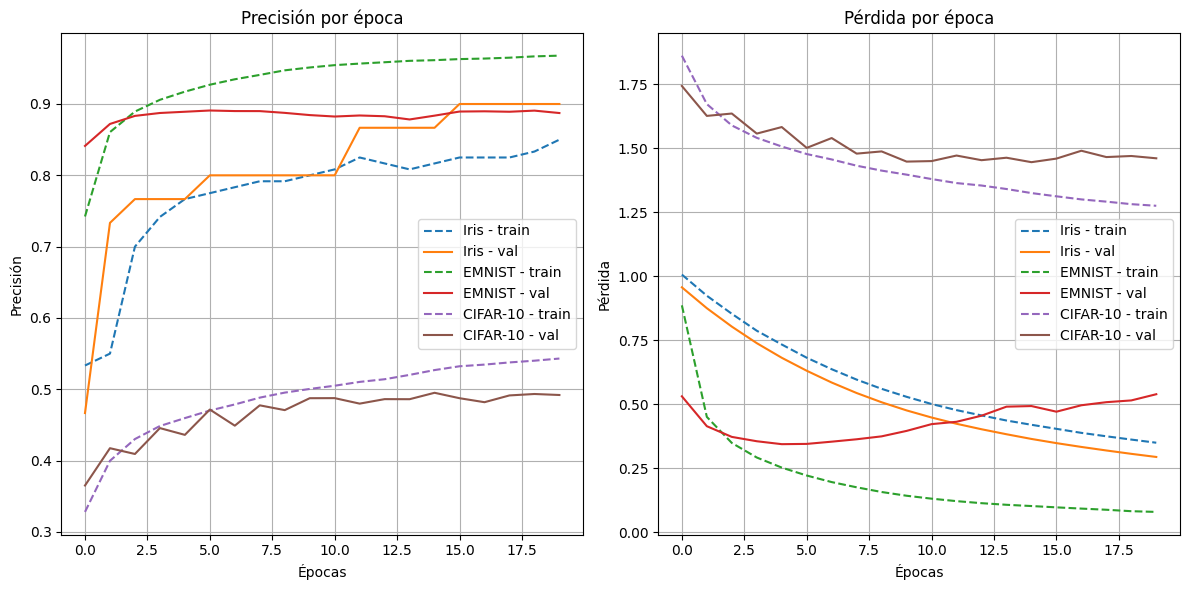

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history_iris.history['accuracy'], label='Iris - train', linestyle='--')
plt.plot(history_iris.history['val_accuracy'], label='Iris - val')
plt.plot(history_emnist.history['accuracy'], label='EMNIST - train', linestyle='--')
plt.plot(history_emnist.history['val_accuracy'], label='EMNIST - val')
plt.plot(history_cifar.history['accuracy'], label='CIFAR-10 - train', linestyle='--')
plt.plot(history_cifar.history['val_accuracy'], label='CIFAR-10 - val')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_iris.history['loss'], label='Iris - train', linestyle='--')
plt.plot(history_iris.history['val_loss'], label='Iris - val')
plt.plot(history_emnist.history['loss'], label='EMNIST - train', linestyle='--')
plt.plot(history_emnist.history['val_loss'], label='EMNIST - val')
plt.plot(history_cifar.history['loss'], label='CIFAR-10 - train', linestyle='--')
plt.plot(history_cifar.history['val_loss'], label='CIFAR-10 - val')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
